<a href="https://colab.research.google.com/github/eiport/Poverty-Prediction/blob/main/PovertyPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
poverty_df = pd.read_csv("/content/povpred.csv")

In [ ]:
poverty_df.columns

Index(['country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literate', 'can_add',
       'can_divide', 'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'has_insurance', 'has_investment',
       'bank_interest_rate', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'can_call_viaphone',
       'can_text_viaphone', 'can_use_internet_viaphone', 'active_bank_user',
       'poverty_probability'],
      dtype='object')

In [ ]:
poverty_df.drop(['borrowing_recency'], axis=1, inplace=True)

In [ ]:
poverty_df.shape

(12600, 31)

In [ ]:
poverty_df.isnull().sum()

country                                      0
is_urban                                     0
age                                          0
female                                       0
married                                      0
religion                                     0
relationship_to_hh_head                      0
education_level                            236
literate                                     0
can_add                                      0
can_divide                                   0
employed_last_year                           0
employment_category_last_year                0
employment_type_last_year                    0
income_own_business_last_year                0
income_private_sector_last_year              0
income_public_sector_last_year               0
num_times_borrowed_last_year                 0
formal_savings                               0
informal_savings                             0
has_insurance                                0
has_investmen

In [ ]:
poverty_df['education_level'].value_counts()

1.0    4550
2.0    4083
0.0    2545
3.0    1186
Name: education_level, dtype: int64

In [ ]:
poverty_df['education_level'].isnull().sum()

236

In [ ]:
poverty_df['education_level'].fillna(poverty_df['education_level'].mode().iloc[0], inplace=True)

In [ ]:
poverty_df.isnull().sum()

country                                      0
is_urban                                     0
age                                          0
female                                       0
married                                      0
religion                                     0
relationship_to_hh_head                      0
education_level                              0
literate                                     0
can_add                                      0
can_divide                                   0
employed_last_year                           0
employment_category_last_year                0
employment_type_last_year                    0
income_own_business_last_year                0
income_private_sector_last_year              0
income_public_sector_last_year               0
num_times_borrowed_last_year                 0
formal_savings                               0
informal_savings                             0
has_insurance                                0
has_investmen

In [ ]:
poverty_df = poverty_df.drop(poverty_df[['bank_interest_rate']], axis=1)

In [ ]:
poverty_df.isnull().sum()

country                                  0
is_urban                                 0
age                                      0
female                                   0
married                                  0
religion                                 0
relationship_to_hh_head                  0
education_level                          0
literate                                 0
can_add                                  0
can_divide                               0
employed_last_year                       0
employment_category_last_year            0
employment_type_last_year                0
income_own_business_last_year            0
income_private_sector_last_year          0
income_public_sector_last_year           0
num_times_borrowed_last_year             0
formal_savings                           0
informal_savings                         0
has_insurance                            0
has_investment                           0
borrowed_for_emergency_last_year         0
borrowed_fo

In [ ]:
poverty_df.shape

(12600, 30)

In [ ]:
poverty_df.dtypes

country                                   object
is_urban                                    bool
age                                        int64
female                                      bool
married                                     bool
religion                                  object
relationship_to_hh_head                   object
education_level                          float64
literate                                    bool
can_add                                     bool
can_divide                                  bool
employed_last_year                          bool
employment_category_last_year             object
employment_type_last_year                 object
income_own_business_last_year               bool
income_private_sector_last_year             bool
income_public_sector_last_year              bool
num_times_borrowed_last_year               int64
formal_savings                              bool
informal_savings                            bool
has_insurance       

In [ ]:
#sns.pairplot(poverty_df)

In [ ]:
poverty_df.corr()

,is_urban,age,female,married,education_level,literate,can_add,can_divide,employed_last_year,income_own_business_last_year,...,has_insurance,has_investment,borrowed_for_emergency_last_year,borrowed_for_daily_expenses_last_year,borrowed_for_home_or_biz_last_year,can_call_viaphone,can_text_viaphone,can_use_internet_viaphone,active_bank_user,poverty_probability
is_urban,1.000000,-0.063885,0.013541,-0.088513,0.229826,0.186095,0.049011,0.074385,-0.017741,0.061495,...,0.068003,0.054218,-0.041056,-0.034231,0.009123,0.119686,0.198417,0.222668,0.155495,-0.290159
age,-0.063885,1.000000,-0.056732,0.228196,-0.304498,-0.255776,-0.132204,-0.141160,0.129071,0.020088,...,0.028860,0.035162,0.014577,-0.000726,-0.002577,-0.230729,-0.292877,-0.249548,0.064732,0.007226
female,0.013541,-0.056732,1.000000,0.013670,-0.150724,-0.113890,-0.074658,-0.129607,-0.303626,-0.066881,...,-0.036964,-0.083265,-0.013160,-0.022934,-0.035461,-0.101994,-0.133490,-0.159167,-0.125523,0.057990
married,-0.088513,0.228196,0.013670,1.000000,-0.149392,-0.106998,0.015221,0.030469,0.077814,0.013611,...,-0.015779,0.014791,0.038256,0.013730,-0.000659,-0.034149,-0.165388,-0.193832,0.032531,0.098294
education_level,0.229826,-0.304498,-0.150724,-0.149392,1.000000,0.586861,0.188329,0.232784,0.016496,0.092747,...,0.153976,0.139044,-0.000257,-0.014816,0.069504,0.331981,0.484554,0.448410,0.277814,-0.345607
literate,0.186095,-0.255776,-0.113890,-0.106998,0.586861,1.000000,0.114596,0.233505,0.000705,0.088601,...,0.170388,0.076693,-0.034808,-0.046112,0.044486,0.302225,0.448964,0.326788,0.203795,-0.198561
can_add,0.049011,-0.132204,-0.074658,0.015221,0.188329,0.114596,1.000000,0.357409,0.013991,0.044467,...,0.008672,0.063264,0.031229,0.020899,0.040502,0.149375,0.123198,0.084421,0.060645,-0.086386
can_divide,0.074385,-0.141160,-0.129607,0.030469,0.232784,0.233505,0.357409,1.000000,-0.021904,0.059417,...,0.077037,0.054987,-0.048524,-0.040069,-0.012760,0.161238,0.161654,0.123498,0.119884,-0.043840
employed_last_year,-0.017741,0.129071,-0.303626,0.077814,0.016496,0.000705,0.013991,-0.021904,1.000000,0.346969,...,0.086624,0.305072,0.121268,0.084727,0.172735,0.079683,0.065187,0.021091,0.100840,-0.041584
income_own_business_last_year,0.061495,0.020088,-0.066881,0.013611,0.092747,0.088601,0.044467,0.059417,0.346969,1.000000,...,0.077879,0.531636,0.042494,0.018280,0.202344,0.114474,0.155952,0.066818,0.043125,-0.103903


In [ ]:
poverty_df['income'] = (poverty_df['income_own_business_last_year'] == 1) | \
                            (poverty_df['income_private_sector_last_year'] == 1) | \
                            (poverty_df['income_public_sector_last_year'] == 1)

In [ ]:
poverty_df['savings'] = (poverty_df['formal_savings'] == 1) | \
                            (poverty_df['informal_savings'] == 1)

In [ ]:
poverty_df['digital_literacy'] = (poverty_df['can_call_viaphone'] == 1) | \
                            (poverty_df['can_text_viaphone'] == 1) | \
                            (poverty_df['can_use_internet_viaphone'] == 1)

In [ ]:
poverty_df['long_term_plan'] = (poverty_df['has_insurance'] == 1) | \
                            (poverty_df['has_investment'] == 1)

In [ ]:
poverty_df['borrowed'] = (poverty_df['borrowed_for_emergency_last_year'] == 1) | \
                            (poverty_df['borrowed_for_daily_expenses_last_year'] == 1) | \
                            (poverty_df['borrowed_for_home_or_biz_last_year'] == 1) | \
                            (poverty_df['num_times_borrowed_last_year'] > 0)

In [ ]:
poverty_df['poverty_status'] = (poverty_df['poverty_probability'] > 0.5).astype(int)

In [ ]:
poverty_df['poverty_status'].value_counts()

1    8117
0    4483
Name: poverty_status, dtype: int64

In [ ]:
poverty_df = pd.get_dummies(poverty_df, columns=['country'], drop_first=True)

In [ ]:
poverty_drop = poverty_df.drop(['poverty_probability', 'can_add', 'can_divide', 'income_own_business_last_year','income_private_sector_last_year','income_public_sector_last_year' , 'formal_savings', 'informal_savings', 'can_call_viaphone', 'can_text_viaphone', 'can_use_internet_viaphone', 'has_insurance', 'has_investment', 'borrowed_for_emergency_last_year', 'borrowed_for_daily_expenses_last_year', 'borrowed_for_home_or_biz_last_year', 'num_times_borrowed_last_year', 'employment_type_last_year', 'employment_category_last_year', 'religion', 'relationship_to_hh_head', 'poverty_probability','literate','age' ,'married', 'digital_literacy','employed_last_year'], axis=1)

<Axes: >

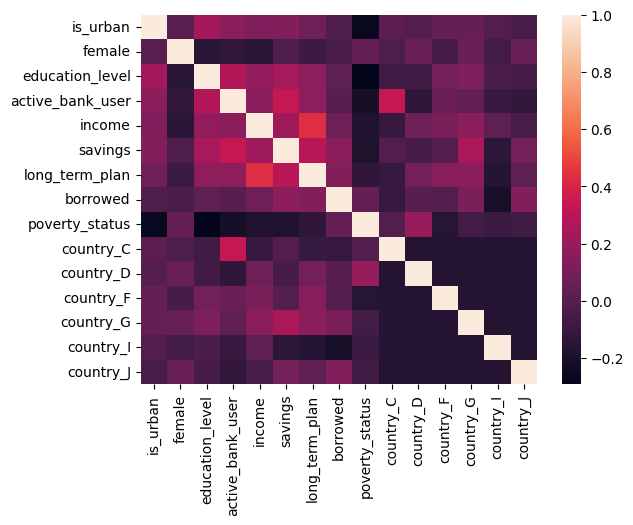

In [ ]:
sns.heatmap(poverty_drop.corr())

In [ ]:
poverty_drop.corr()

,is_urban,female,education_level,active_bank_user,income,savings,long_term_plan,borrowed,poverty_status,country_C,country_D,country_F,country_G,country_I,country_J
is_urban,1.000000,0.013541,0.229826,0.155495,0.126072,0.132901,0.070741,-0.025321,-0.264711,0.019338,-0.008614,0.043171,0.048680,-0.011736,-0.040910
female,0.013541,1.000000,-0.150724,-0.125523,-0.147319,-0.027909,-0.083819,-0.036672,0.047904,-0.029306,0.053904,-0.045405,0.054833,-0.063617,0.054272
education_level,0.229826,-0.150724,1.000000,0.277814,0.178543,0.239211,0.166958,0.024126,-0.292599,-0.073009,-0.067138,0.086264,0.119559,-0.038362,-0.052505
active_bank_user,0.155495,-0.125523,0.277814,1.000000,0.155397,0.337325,0.166932,0.002263,-0.216707,0.331521,-0.131554,0.058323,0.031785,-0.095888,-0.117129
income,0.126072,-0.147319,0.178543,0.155397,1.000000,0.215251,0.432655,0.069043,-0.179052,-0.104121,0.070436,0.112905,0.165957,0.023933,-0.042003
savings,0.132901,-0.027909,0.239211,0.337325,0.215251,1.000000,0.291801,0.161218,-0.186924,-0.010798,-0.053850,-0.006595,0.256330,-0.136926,0.086991
long_term_plan,0.070741,-0.083819,0.166958,0.166932,0.432655,0.291801,1.000000,0.132195,-0.126920,-0.108884,0.090210,0.148331,0.154743,-0.164355,0.024026
borrowed,-0.025321,-0.036672,0.024126,0.002263,0.069043,0.161218,0.132195,1.000000,0.044722,-0.101909,0.004764,-0.009615,0.114681,-0.208710,0.134785
poverty_status,-0.264711,0.047904,-0.292599,-0.216707,-0.179052,-0.186924,-0.126920,0.044722,1.000000,-0.017943,0.193769,-0.159668,-0.065202,-0.092739,-0.070495
country_C,0.019338,-0.029306,-0.073009,0.331521,-0.104121,-0.010798,-0.108884,-0.101909,-0.017943,1.000000,-0.166536,-0.163327,-0.165256,-0.165630,-0.167281


In [ ]:
X = poverty_drop.drop(poverty_df[['poverty_status' ]], axis=1)
y = poverty_df['poverty_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_urban          12600 non-null  bool   
 1   female            12600 non-null  bool   
 2   education_level   12600 non-null  float64
 3   active_bank_user  12600 non-null  bool   
 4   income            12600 non-null  bool   
 5   savings           12600 non-null  bool   
 6   long_term_plan    12600 non-null  bool   
 7   borrowed          12600 non-null  bool   
 8   country_C         12600 non-null  uint8  
 9   country_D         12600 non-null  uint8  
 10  country_F         12600 non-null  uint8  
 11  country_G         12600 non-null  uint8  
 12  country_I         12600 non-null  uint8  
 13  country_J         12600 non-null  uint8  
dtypes: bool(7), float64(1), uint8(6)
memory usage: 258.5 KB
None


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)
predictions

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [ ]:
print(accuracy_score(y_test,predictions))

0.7396825396825397


In [ ]:
cm = confusion_matrix(y_test,predictions)
print(cm)

[[ 677  629]
 [ 355 2119]]


In [ ]:
poverty_df.poverty_status.value_counts()

1    8117
0    4483
Name: poverty_status, dtype: int64

In [ ]:
sklearn.metrics.precision_score(y_test, predictions)

0.7711062590975255

In [ ]:
sklearn.metrics.recall_score(y_test, predictions)

0.8565076798706548

In [ ]:
sklearn.metrics.recall_score(y_test, predictions, pos_label =0)

0.5183767228177641

In [ ]:
sklearn.metrics.f1_score(y_test, predictions)

0.8115664496361548

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.00153139 ... 0.99617152 0.99617152 1.        ]
[0.         0.00687146 0.01414713 ... 0.9995958  1.         1.        ]
[1.97829868 0.97829868 0.97646571 ... 0.06944884 0.0688533  0.06427522]


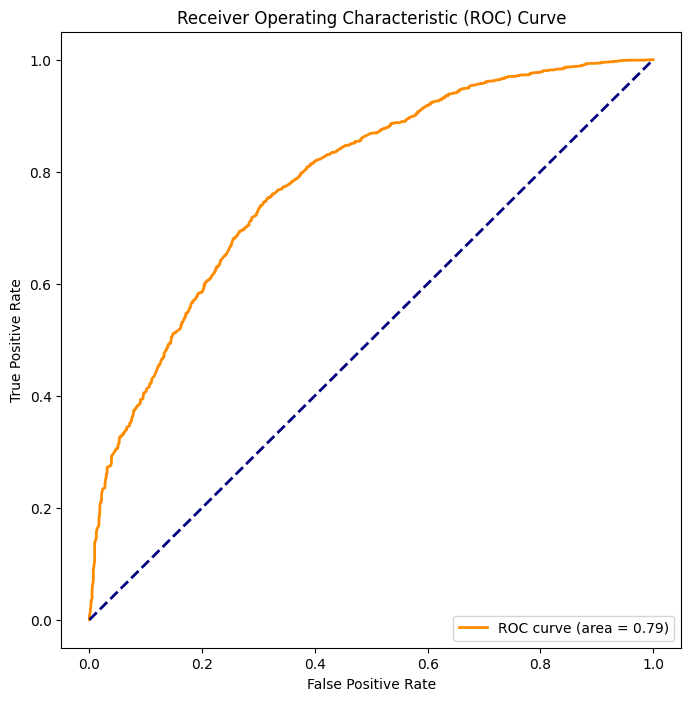

In [ ]:
# Plot ROC curve
import matplotlib.pyplot as plt

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('classification report:')
print(classification_report(y_test, predictions))

classification report:
              precision    recall  f1-score   support

           0       0.66      0.52      0.58      1306
           1       0.77      0.86      0.81      2474

    accuracy                           0.74      3780
   macro avg       0.71      0.69      0.70      3780
weighted avg       0.73      0.74      0.73      3780

